In [1]:
import pandas as pd

In [5]:
data={'Age':[22,25,47,52,46,56,55,120,45,25,23,36,37,38,39,40,160,5,-1,200],
      'Salary':[5000,7000,12000,13000,11000,13000,1000,0,-6000,8000,40000,4000,-20000,4,8000,7000,6000,5000,0,6000],
      'Experience':[2,2,5,7,6,8,7,10,5,-5,1,15,16,17,18,19,20,0,-1,100],
      'no_of_car':[1,0,2,3,2,4,3,5,2,0,1,3,4,3000,9,10,11,0,1,100]}
df=pd.DataFrame(data)

In [6]:
df.describe()

,Age,Salary,Experience,no_of_car
count,20.00000,20.000000,20.000000,20.000000
mean,53.50000,6000.200000,12.600000,158.050000
std,49.99421,10963.940934,21.840089,669.281034
min,-1.00000,-20000.000000,-5.000000,0.000000
25%,25.00000,751.000000,2.000000,1.000000
50%,39.50000,6000.000000,7.000000,3.000000
75%,52.75000,8750.000000,16.250000,6.000000
max,200.00000,40000.000000,100.000000,3000.000000


In [7]:
df_non_negative=df[(df>=0).all(axis=1)]
df_non_negative.describe()


,Age,Salary,Experience,no_of_car
count,16.000000,16.000000,16.00000,16.000000
mean,60.250000,8625.250000,14.81250,197.125000
std,53.312288,9358.351048,23.69309,747.825637
min,5.000000,0.000000,0.00000,0.000000
25%,33.250000,4750.000000,4.25000,1.750000
50%,43.000000,6500.000000,7.50000,3.000000
75%,55.250000,11250.000000,17.25000,9.250000
max,200.000000,40000.000000,100.00000,3000.000000


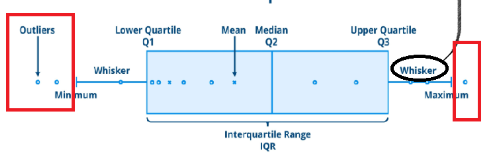

In [9]:
df_IQr=df_non_negative.copy()

In [12]:
df_IQr

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
10,23,40000,1,1
11,36,4000,15,3


In [27]:
for col in df_IQr.columns:
    Q1=df_IQr[col].quantile(0.25)
    Q3=df_IQr[col].quantile(0.75)
    IQR=Q3-Q1
    LowerBound=Q1 - 1.5 * IQR
    UpperBound=Q3 + 1.5 * IQR
    df_IQR_Clean=df_IQr[((df_IQr[col]>=LowerBound) & (df_IQr[col]<=UpperBound))]
print(f"length before clean: {len(df_IQr)}")
print(f"length after clean: {len(df_IQR_Clean)}")    
    

length before clean: 16
length after clean: 14


In [28]:
df_IQR_Clean

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
10,23,40000,1,1
11,36,4000,15,3


In [29]:
Df_Z_SCore=df_non_negative.copy()

In [30]:
from scipy.stats import zscore
import numpy as np  
z_scores=np.abs(zscore(Df_Z_SCore))
df_zscore_clean=Df_Z_SCore[(z_scores<3).all(axis=1)]
print(f"length before clean: {len(Df_Z_SCore)}")
print(f"length after clean: {len(df_zscore_clean)}")

length before clean: 16
length after clean: 13


In [37]:
df_isolation_forest=df_non_negative.copy()

In [48]:
from sklearn.ensemble import IsolationForest 
model=IsolationForest(contamination=0.4,random_state=42)
df_isolation_forest['anomaly']=model.fit_predict(df_isolation_forest)


In [49]:
df_isolation_forest_clean=df_isolation_forest[df_isolation_forest['anomaly']==1].drop(columns=['anomaly'])

In [50]:
df_isolation_forest_clean

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
11,36,4000,15,3
14,39,8000,18,9
15,40,7000,19,10


# *Scaling*

______________________________________

In [51]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler 

In [63]:
scaler = MinMaxScaler()
df_scaled=scaler.fit_transform(df_isolation_forest_clean)


In [64]:
df_scaled=pd.DataFrame(df_scaled,columns=df_isolation_forest_clean.columns)

In [65]:
df_scaled.describe()    

,Age,Salary,Experience,no_of_car
count,10.000000,10.000000,10.000000,10.000000
mean,0.582353,0.591667,0.405882,0.370000
std,0.345732,0.341226,0.366252,0.326769
min,0.000000,0.000000,0.000000,0.000000
25%,0.433824,0.375000,0.191176,0.200000
50%,0.617647,0.541667,0.294118,0.300000
75%,0.845588,0.895833,0.661765,0.375000
max,1.000000,1.000000,1.000000,1.000000


In [66]:
scaler2= StandardScaler()
df_scaled2=scaler2.fit_transform(df_isolation_forest_clean)

In [67]:
df_scaled2=pd.DataFrame(df_scaled2,columns=df_isolation_forest_clean.columns)

In [68]:
df_scaled2.describe()

,Age,Salary,Experience,no_of_car
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01
mean,2.553513e-16,0.000000,-2.220446e-17,-4.440892e-17
std,1.054093e+00,1.054093,1.054093e+00,1.054093e+00
min,-1.775517e+00,-1.827737,-1.168150e+00,-1.193548e+00
25%,-4.528465e-01,-0.669312,-6.179344e-01,-5.483871e-01
50%,1.076071e-01,-0.154457,-3.216645e-01,-2.258065e-01
75%,8.025696e-01,0.939611,7.364424e-01,1.612903e-02
max,1.273351e+00,1.261396,1.709901e+00,2.032258e+00


In [69]:
scaler3=RobustScaler()
df_scaled3=scaler3.fit_transform(df_isolation_forest_clean)


In [60]:
df_scaled3

array([[-1.5       , -0.4       , -0.625     , -1.14285714],
       [-1.28571429, -0.08      , -0.625     , -1.71428571],
       [ 0.28571429,  0.72      , -0.25      , -0.57142857],
       [ 0.64285714,  0.88      ,  0.        ,  0.        ],
       [ 0.21428571,  0.56      , -0.125     , -0.57142857],
       [ 0.92857143,  0.88      ,  0.125     ,  0.57142857],
       [ 0.85714286, -1.04      ,  0.        ,  0.        ],
       [-0.5       , -0.56      ,  1.        ,  0.        ],
       [-0.28571429,  0.08      ,  1.375     ,  3.42857143],
       [-0.21428571, -0.08      ,  1.5       ,  4.        ]])

In [70]:
df_scaled3=pd.DataFrame(df_scaled3,columns=df_isolation_forest_clean.columns)
df_scaled3.describe()

,Age,Salary,Experience,no_of_car
count,10.000000,10.000000,10.000000,10.000000
mean,-0.085714,0.096000,0.237500,0.400000
std,0.839636,0.655154,0.778286,1.867250
min,-1.500000,-1.040000,-0.625000,-1.714286
25%,-0.446429,-0.320000,-0.218750,-0.571429
50%,0.000000,0.000000,0.000000,0.000000
75%,0.553571,0.680000,0.781250,0.428571
max,0.928571,0.880000,1.500000,4.000000


In [72]:
scaler4=MaxAbsScaler()
df_scaled4=scaler4.fit_transform(df_isolation_forest_clean)

In [74]:
df_scaled4=pd.DataFrame(df_scaled4,columns=df_isolation_forest_clean.columns)

In [75]:
df_scaled4.describe()

,Age,Salary,Experience,no_of_car
count,10.000000,10.000000,10.000000,10.000000
mean,0.746429,0.623077,0.468421,0.370000
std,0.209909,0.314978,0.327699,0.326769
min,0.392857,0.076923,0.105263,0.000000
25%,0.656250,0.423077,0.276316,0.200000
50%,0.767857,0.576923,0.368421,0.300000
75%,0.906250,0.903846,0.697368,0.375000
max,1.000000,1.000000,1.000000,1.000000
